# Explore `Station` Data

In this short report we explore the `station` data by visualizing it in different ways. 

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from IPython.display import Image
from html_to_png import html_to_png

In [2]:
% matplotlib inline

# select ggplot stype
plt.style.use("ggplot")

In [3]:
# read data into a pandas dataframe
df_station = pd.read_csv("../data/station.csv", parse_dates=["installation_date"])

# display the data
df_station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-05
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,2013-08-05
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,2013-08-07


### Plot the five cities in the SF Bay Area

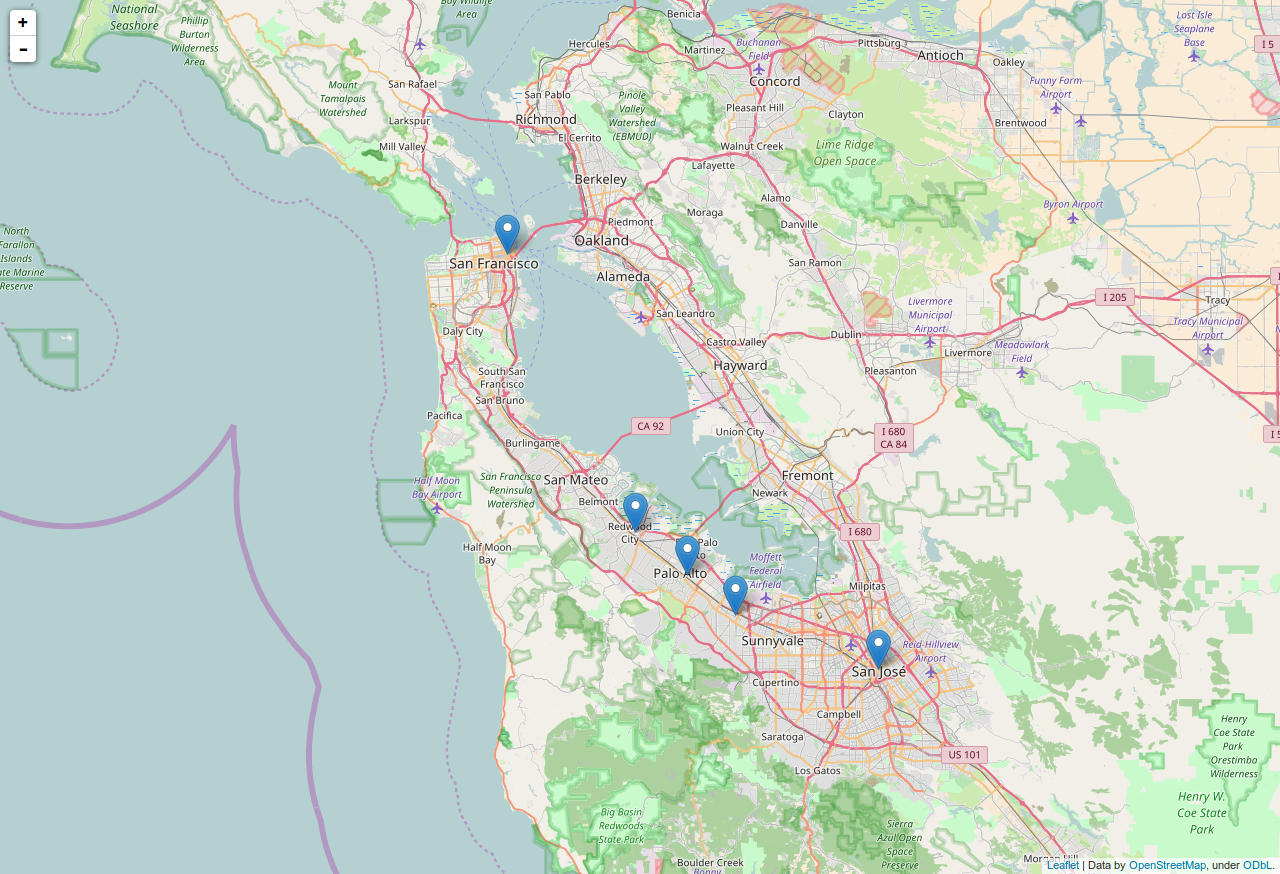

In [4]:
# plot the city map
city_map = folium.Map(location=[df_station.lat.mean(), df_station.long.mean()])

# aggregate by city and take the mean value to get the center location of the cities
dfn = df_station.groupby(by='city', as_index=False).mean()

# mark the cities
for idx, row in dfn.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(city_map)
    
# save the output as .html
output_html = "./screenshots/city_map.html"
city_map.save(output_html)

# Convert the html to png so that it can be displayed in GitHub
output_png = "./screenshots/city_map.png"
html_to_png(output_html, output_png=output_png)
Image(filename=output_png)

### Plot the number of stations per city 

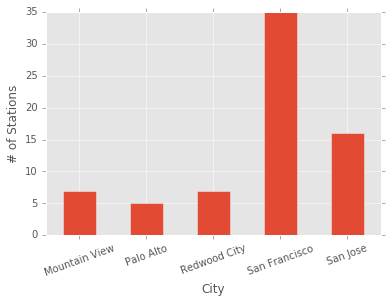

In [5]:
# aggregate the data by city and count the elements
dfn = df_station.groupby(by='city', as_index=False).count()

# plot the data
fig, ax = plt.subplots()
dfn.plot(ax=ax, x=['city'], y=['id'], kind="bar")

# set x, y labels
ax.set(xlabel="City", ylabel="# of Stations")

# rotate the x-axis tick labels
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=20)

# hide the lagends
ax.legend().set_visible(False)

plt.show()

The plot shows the distribution of stations among the different cites in the Bay area. We can see that San Francisco has much largest number of stations than the other cities.     

### Plot the number of docks per city

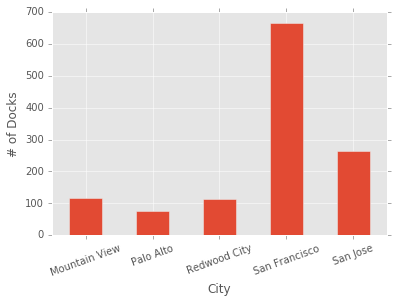

In [6]:
# aggregate the data by city and sum them
dfn = df_station.groupby(by='city', as_index=False).sum()

# plot the data
fig, ax = plt.subplots()
dfn.plot(ax=ax, x=['city'], y=['dock_count'], kind="bar")

# set x, y labels
ax.set(xlabel="City", ylabel="# of Docks")

# rotate the x-axis tick labels
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=20)

# hide the lagends
ax.legend().set_visible(False)

plt.show()


This plot shows the number of docks versus cites. It has a similar distribution as the previous plot.

### Plot dock number versus station

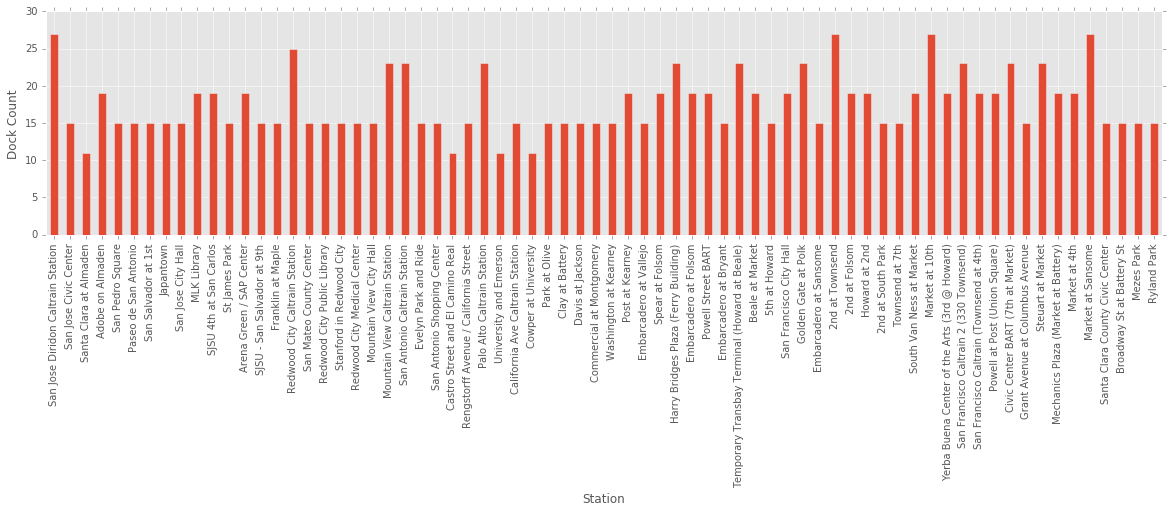

In [7]:
# plot the dock number versus station
fig, ax = plt.subplots(figsize=(20, 4))
df_station.plot(ax=ax, x=["name"], y=["dock_count"], kind="bar")

# set x, y labels
ax.set(xlabel="Station", ylabel="Dock Count")

# hide the lagends
ax.legend().set_visible(False)

The plot above shows the number of docks versus stations. To make it easy for reading the plot, the following tables display the stations who have the most and the least number of docks. 

In [8]:
# display the 5 stations who have the largest number of Dock Count
df_station.sort_values(by="dock_count", ascending=False).head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,2013-08-25
49,61,2nd at Townsend,37.780526,-122.390288,27,San Francisco,2013-08-22
55,67,Market at 10th,37.776619,-122.417385,27,San Francisco,2013-08-23
15,22,Redwood City Caltrain Station,37.486078,-122.232089,25,Redwood City,2013-08-15


In [9]:
# display the 5 stations who have least number of Dock Count
df_station.sort_values(by="dock_count", ascending=True).head()

,id,name,lat,long,dock_count,city,installation_date
25,32,Castro Street and El Camino Real,37.385956,-122.083678,11,Mountain View,2013-12-31
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06
28,35,University and Emerson,37.444521,-122.163093,11,Palo Alto,2013-08-15
30,37,Cowper at University,37.448598,-122.159504,11,Palo Alto,2013-08-14
34,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,2013-08-19


### Plot the *installation_date* versus *station id*

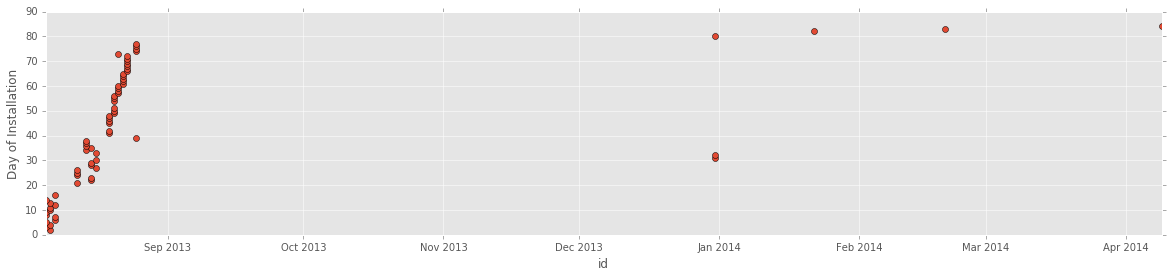

In [12]:
# plot installation_date vs station id
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(df_station.installation_date, df_station.id, "o")

# set x, y labels
ax.set(xlabel="id", ylabel="Day of Installation")

# hide the lagends
ax.legend().set_visible(False)

From the figure above we can see that not all the stations were constructed at the same time. Most of them were installed within the first month between Aug. 1th, 2013 and Sep. 1th, 2013. There are 6 stations that have been built at least around four months later than the rest of them. Below we show the 7 most recently installed stations in a table format.

In [17]:
df_station.sort_values(by="installation_date", ascending=False).head(7)

,id,name,lat,long,dock_count,city,installation_date
69,84,Ryland Park,37.342725,-121.895617,15,San Jose,2014-04-09
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2014-02-20
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,2014-01-22
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,2013-12-31
24,31,San Antonio Shopping Center,37.400443,-122.108338,15,Mountain View,2013-12-31
25,32,Castro Street and El Camino Real,37.385956,-122.083678,11,Mountain View,2013-12-31
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,2013-08-25
